In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute, roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [47]:
#Load and define data columns names
train_noop3=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None)
num_columns = train_noop3.shape[1]
columns_noop = ['unit', 'time', 'op1', 'op2', 'op3'] + [f'sr{i+1}' for i in range(num_columns - 5)]
train_noop3.columns = columns_noop

#Calculate RUL 
train_noop3['max_time'] = train_noop3.groupby('unit')['time'].transform('max')
train_noop3['remaining_time'] = train_noop3['max_time'] - train_noop3['time']
train_noop3['label'] = train_noop3['remaining_time'].clip(upper=130)
train_noop3 = train_noop3.drop(columns=['op1', 'op2', 'op3'])
train_noop3.head()

C:\Users\65962\AppData\Local\Temp\ipykernel_28940\3251692485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_noop3=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None)


,unit,time,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258,130
1,1,2,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257,130
2,1,3,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256,130
3,1,4,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255,130
4,1,5,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254,130


In [101]:
#Roll time series data 
window_size=50
rolled_df_noop = roll_time_series(train_noop3,
                                  column_id='unit',
                                  column_sort='time',
                                  max_timeshift=window_size - 1,
                                  min_timeshift=window_size - 1,
                                  rolling_direction=1)

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  7.01it/s]


In [102]:
#Select columns (no op settings)
selected_cols_noop = ['id', 'sr2', 'sr3', 'sr4', 'sr7', 'sr8', 'sr9', 'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr17', 'sr20', 'sr21']
selected_df_noop = rolled_df_noop[selected_cols_noop]
selected_df_noop

,id,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 50)",642.36,1583.23,1396.84,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,"(1, 50)",642.50,1584.69,1396.89,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,"(1, 50)",642.18,1582.35,1405.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,"(1, 50)",642.92,1585.61,1392.27,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,"(1, 50)",641.68,1588.63,1397.65,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514395,"(100, 152)",643.78,1596.01,1424.11,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631
514396,"(100, 152)",643.29,1596.38,1429.14,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746
514397,"(100, 152)",643.84,1604.53,1431.41,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682
514398,"(100, 152)",643.94,1597.56,1426.57,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753


In [103]:
#Extract Features 

from tsfresh.feature_extraction import EfficientFCParameters

efficient_params = EfficientFCParameters()

def batch_feature_extraction(df, batch_size=100):
    feature_batches = []
    for i in range(0, len(df['id'].unique()), batch_size):
        batch_df = df[df['id'].isin(df['id'].unique()[i:i + batch_size])]
        X_batch = extract_features(batch_df,
                                   column_id='id',
                                   default_fc_parameters=efficient_params,
                                   impute_function=impute)
        feature_batches.append(X_batch)
    return pd.concat(feature_batches)

X3_noop = batch_feature_extraction(selected_df_noop, batch_size=100)
X3_noop.head()


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.99it/s]


sr12__variance_larger_than_standard_deviation  sr12__has_duplicate_max  \
1 50                                            0.0                      0.0   
  51                                            0.0                      0.0   
  52                                            0.0                      0.0   
  53                                            0.0                      0.0   
  54                                            0.0                      0.0   

      sr12__has_duplicate_min  sr12__has_duplicate  sr12__sum_values  \
1 50                      0.0                  1.0          26114.34   
  51                      0.0                  1.0          26114.43   
  52                      0.0                  1.0          26113.70   
  53                      0.0                  1.0          26114.07   
  54                      0.0                  1.0          26113.86   

      sr12__abs_energy  sr12__mean_abs_change  sr12__mean_change  \
1 50      1.363918e+07               0.277959          -0.006122   
  51      1.363927e+07               0.283673          -0.000408   
  52      1.363851e+07               0.290204          -0.006939   
  53      1.363890e+07               0.295306          -0.001837   
  54      1.363868e+07               0.295918          -0.006122   

      sr12__mean_second_derivative_central  sr12__median  ...  \
1 50                             -0.000417       522.245  ...   
  51                              0.008125       522.245  ...   
  52                             -0.012187       522.225  ...   
  53                              0.006458       522.245  ...   
  54                              0.000417       522.245  ...   

      sr11__fourier_entropy__bins_5  sr11__fourier_entropy__bins_10  \
1 50                       0.938809                        1.481795   
  51                       0.917031                        1.552577   
  52                       0.969341                        1.615187   
  53                       0.969341                        1.615187   
  54                       0.969341                        1.541743   

      sr11__fourier_entropy__bins_100  \
1 50                         2.844614   
  51                         2.864739   
  52                         2.844614   
  53                         2.897933   
  54                         2.791295   

      sr11__permutation_entropy__dimension_3__tau_1  \
1 50                                       1.778620   
  51                                       1.781607   
  52                                       1.777200   
  53                                       1.768287   
  54                                       1.765300   

      sr11__permutation_entropy__dimension_4__tau_1  \
1 50                                       2.935207   
  51                                       2.952096   
  52                                       2.963229   
  53                                       2.956000   
  54                                       2.908141   

      sr11__permutation_entropy__dimension_5__tau_1  \
1 50                                       3.647820   
  51                                       3.647820   
  52                                       3.647820   
  53                                       3.647820   
  54                                       3.606309   

      sr11__permutation_entropy__dimension_6__tau_1  \
1 50                                       3.806662   
  51                                       3.806662   
  52                                       3.806662   
  53                                       3.806662   
  54                                       3.806662   

      sr11__permutation_entropy__dimension_7__tau_1  \
1 50                                        3.78419   
  51                                        3.78419   
  52                                        3.78419   
  53                                        3.78419   
  54               

In [104]:
#Select relevant features 
y_noop = rolled_df_noop.groupby('id')['label'].last()
X_filtered_noop = select_features(X3_noop, y_noop)


In [105]:
#Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered_noop)
relevant_features_scaled_noop = scaler.transform(X_filtered_noop)
relevant_features_scaled_df_noop = pd.DataFrame(relevant_features_scaled_noop, columns=X_filtered_noop.columns)


In [106]:
# Train model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train_noop, X_val_noop, y_train_noop, y_val_noop = train_test_split(relevant_features_scaled_df_noop, y_noop, test_size=0.2, random_state=42)

# Train the XGBoost model (ADDITIONAL REGULARISATION TO PREVENT OVERFITTING)
xgb_model_noop = XGBRegressor(objective='reg:squarederror', 
                              random_state=42, 
                              max_depth=5,         # Reduce depth
                              min_child_weight=5,   # Increase min child weight
                              subsample=0.8,        # Use subsample to introduce variance
                              colsample_bytree=0.8, # Use only 80% of features per tree
                              alpha=10, 
                              reg_lambda=1)   
xgb_model_noop.fit(X_train_noop, y_train_noop)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [107]:
# Predict and evaluate
y_pred_noop = xgb_model_noop.predict(X_val_noop)
mse_noop = mean_squared_error(y_val_noop, y_pred_noop)
rmse_noop = mse_noop ** 0.5
print(rmse_noop)

4.298234932743459


In [121]:
#Load test data 
test3_noop = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None)
num_columns = test3_noop.shape[1]
columns_noop = ['unit', 'time', 'op1', 'op2', 'op3'] + [f'sr{i+1}' for i in range(num_columns - 5)]
test3_noop.columns = columns_noop

#Calculate RUL 
test3_noop['max_time'] = test3_noop.groupby('unit')['time'].transform('max')
test3_noop['remaining_time'] = test3_noop['max_time'] - test3_noop['time']
test3_noop['label'] = test3_noop['remaining_time'].clip(upper=130)
test3_noop = test3_noop.drop(columns=['op1', 'op2', 'op3'])
test3_noop.head()

C:\Users\65962\AppData\Local\Temp\ipykernel_28940\4200358407.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test3_noop = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None)


,unit,time,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,518.67,641.94,1581.93,1396.93,14.62,21.58,554.56,2387.93,...,8.3760,0.03,391,2388,100.0,39.07,23.4468,233,232,130
1,1,2,518.67,642.02,1584.86,1398.90,14.62,21.58,554.10,2387.94,...,8.4062,0.03,391,2388,100.0,39.04,23.4807,233,231,130
2,1,3,518.67,641.68,1581.78,1391.92,14.62,21.58,554.41,2387.97,...,8.3553,0.03,391,2388,100.0,39.10,23.4244,233,230,130
3,1,4,518.67,642.20,1584.53,1395.34,14.62,21.59,554.58,2387.94,...,8.3709,0.03,392,2388,100.0,38.97,23.4782,233,229,130
4,1,5,518.67,642.46,1589.03,1395.86,14.62,21.58,554.16,2388.01,...,8.4146,0.03,391,2388,100.0,39.09,23.3950,233,228,130


In [122]:
#Roll time series 
rolled_test_noop = roll_time_series(test3_noop,
                                    column_id='unit',
                                    column_sort='time',
                                    max_timeshift=window_size - 1,
                                    min_timeshift=window_size - 1,
                                    rolling_direction=1)

#Select relevant features
selected_test_noop=rolled_test_noop[selected_cols_noop]
selected_test_noop

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.92it/s]


,id,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
111400,"(1, 50)",641.94,1581.93,1396.93,554.56,2387.93,9048.65,47.09,521.89,2387.94,8133.48,8.3760,391,39.07,23.4468
111401,"(1, 50)",642.02,1584.86,1398.90,554.10,2387.94,9046.53,47.08,521.85,2388.01,8137.44,8.4062,391,39.04,23.4807
111402,"(1, 50)",641.68,1581.78,1391.92,554.41,2387.97,9054.92,47.15,522.10,2387.94,8138.25,8.3553,391,39.10,23.4244
111403,"(1, 50)",642.20,1584.53,1395.34,554.58,2387.94,9055.04,47.26,522.45,2387.96,8137.07,8.3709,392,38.97,23.4782
111404,"(1, 50)",642.46,1589.03,1395.86,554.16,2388.01,9048.59,46.94,521.91,2387.97,8134.20,8.4146,391,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541995,"(100, 247)",643.04,1594.99,1411.28,561.21,2388.24,9088.31,47.61,529.23,2388.24,8162.24,8.2939,395,39.40,23.4949
541996,"(100, 247)",642.47,1591.27,1417.64,561.02,2388.29,9085.35,47.75,529.27,2388.26,8163.24,8.3247,394,39.42,23.6011
541997,"(100, 247)",642.70,1593.81,1412.70,561.16,2388.23,9084.29,47.60,529.48,2388.28,8162.12,8.3264,394,39.43,23.5482
541998,"(100, 247)",642.19,1595.63,1406.58,562.66,2388.24,9092.52,47.69,529.39,2388.33,8164.20,8.2908,395,39.40,23.6687


In [123]:
#Extract features from test data 
X_test_noop=batch_feature_extraction(selected_test_noop, batch_size=100)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  8.64it/s]


In [124]:
#Scale data 
relevant_test_features_noop = X_test_noop[relevant_features_scaled_df_noop.columns]
relevant_test_features_scalednoop = scaler.transform(relevant_test_features_noop)
relevant_test_features_scaled_dfnoop = pd.DataFrame(relevant_test_features_scalednoop, columns=relevant_features_scaled_df_noop.columns)
relevant_test_features_scaled_dfnoop.head()

,sr12__partial_autocorrelation__lag_2,"sr4__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)","sr4__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","sr4__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)","sr12__agg_autocorrelation__f_agg_""mean""__maxlag_40",sr12__autocorrelation__lag_9,sr12__autocorrelation__lag_8,sr12__autocorrelation__lag_7,sr12__autocorrelation__lag_6,sr12__autocorrelation__lag_5,...,"sr20__fft_coefficient__attr_""angle""__coeff_24",sr20__ratio_beyond_r_sigma__r_2,"sr21__fft_coefficient__attr_""imag""__coeff_20","sr4__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2","sr9__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.6","sr2__fft_coefficient__attr_""abs""__coeff_4","sr9__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",sr20__mean_second_derivative_central,"sr12__cwt_coefficients__coeff_8__w_2__widths_(2, 5, 10, 20)","sr7__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max"""
0,-1.014917,-1.004822,-0.433224,-1.016991,0.926882,-0.458605,0.192407,-1.690402,-0.399696,-0.473054,...,0.290432,-0.176453,-0.157132,-1.644313,-0.114204,-0.510995,-0.198601,-1.850871,1.128069,0.161920
1,-1.068127,-1.018571,-0.450939,-1.033194,0.916586,-0.633385,0.287030,-1.518683,-0.368620,-0.413806,...,-1.522252,-0.176453,-0.187660,-2.140531,-0.114204,-1.260345,-0.153101,1.121937,-0.335573,0.453618
2,-1.143103,-1.041284,-0.463571,-1.063939,0.819097,-1.005605,0.181966,-1.370969,-0.329751,-0.230542,...,0.107987,-0.176453,0.499295,-1.344248,-0.114204,-1.126479,0.006604,-0.291365,-1.208204,0.339741
3,-1.162748,-1.051206,-0.568753,-1.082954,0.803424,-0.866613,0.054749,-1.345657,-0.327413,-0.237864,...,-1.674495,-0.176453,-0.595484,-1.205161,-0.313838,-1.566781,0.167631,-0.242630,-0.588488,0.254089
4,-1.227775,-1.081291,-0.691387,-1.095089,0.786058,-0.861953,-0.061046,-1.234008,-0.379060,-0.265312,...,-0.017489,-0.176453,0.380126,-1.392483,-0.544993,-1.315197,0.514083,0.147246,0.687273,-0.029074


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [126]:
#Load real RUL values 
rul3_noop=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\RUL_FD003.txt', header=None, names=['RUL'])

In [127]:
#Assign to true RUL values 
Y3_test=rul3_noop['RUL']
Y3_test

0      44
1      51
2      27
3     120
4     101
     ... 
95    113
96    123
97     17
98      8
99     28
Name: RUL, Length: 100, dtype: int64

In [129]:
#Predict RUL using model 
y_pred_nooptest=xgb_model_noop.predict(relevant_test_features_scaled_dfnoop)
temp_noop_test = rolled_test_noop.groupby('id').last()
temp_noop_test['prediction']=y_pred_nooptest
temp_noop_test

Y_pred_noop=temp_noop_test.groupby('unit')['prediction'].last()
Y_pred_noop=Y_pred_noop.to_numpy()

mse_test=mean_squared_error(Y3_test, Y_pred_noop)
rmse_test=mse_test**0.5
rmse_test

np.float64(53.70708152054157)

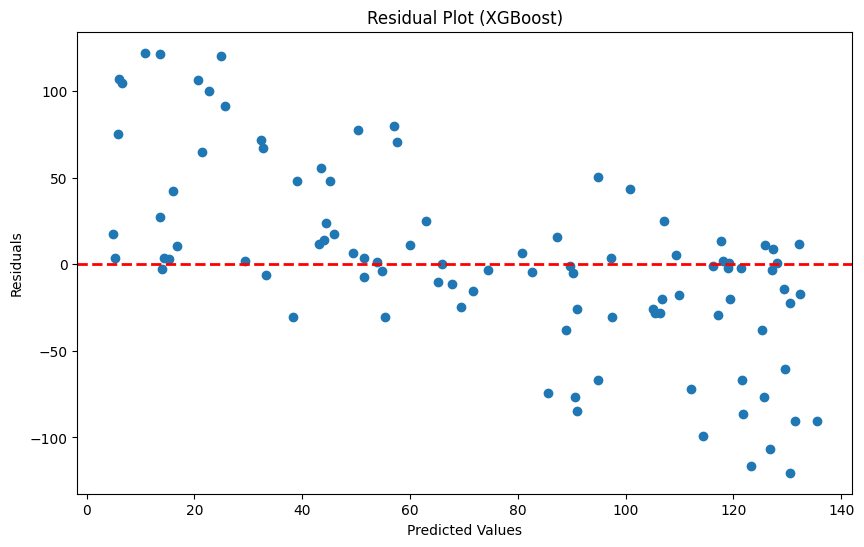

In [130]:
residuals_noop=Y3_test-Y_pred_noop

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_noop, residuals_noop)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()